# Exploratory Data Analysis

In [1]:
import os
import pandas as pd

## ICD

In [2]:
icd = pd.read_excel("../icd_tokenize/data/中文字典_1100712_提供張老師_自定義字典.xlsx")
display(icd.head())

,中文診斷,註記,ICD1_Iris,ICD2_Iris,ICD3_Iris,ICD4_Iris,ICD5_Iris
0,泌尿道感染,0,N139,NaN,NaN,NaN,NaN
1,0402台鐵列車出軌事故,0,V813,NaN,NaN,NaN,NaN
2,18三套體,0,Q913,NaN,NaN,NaN,NaN
3,18對短臂症候群,0,Q935,NaN,NaN,NaN,NaN
4,２、３、４、５肋骨骨折,0,S224,NaN,NaN,NaN,NaN


<Axes: title={'center': 'ICD 個數'}>

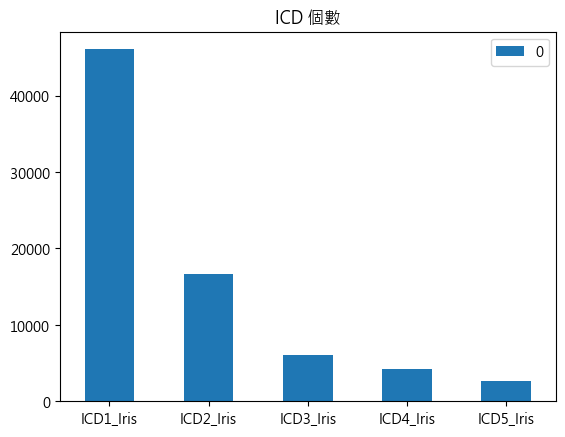

In [3]:
icd_count = icd.count()
pd.DataFrame(icd_count[2:7]).plot(kind='bar', rot=0, title='ICD 個數')

In [4]:
for col in icd.columns:
    print(col, len(icd[col].dropna().unique()))

中文診斷 46069
註記 8
ICD1_Iris 3568
ICD2_Iris 822
ICD3_Iris 84
ICD4_Iris 34
ICD5_Iris 24


## Dataset

In [5]:
files = os.listdir("../data")
files = list(filter(lambda f: f[:2] != "~$", files))  # Prevent processing temporary excel files

df_list = []
for file in files:
    df = pd.read_excel(f"../data/{file}", header=1)
    df_list.append(df)
    print(file, df.shape)

1110217_斷字比對(11101).xlsx (14773, 46)
1110316_斷字比對(11102).xlsx (15092, 46)
1110420_斷字比對(11103).xlsx (17007, 46)
1110523_斷字比對(11104).xlsx (13519, 46)
1110623_斷字比對(11105).xlsx (16611, 46)
1110727_斷字比對(11106).xlsx (18832, 46)
1110829_斷字比對(11107).xlsx (16601, 46)
1110922_斷字比對(11108).xlsx (15385, 46)
1111025_斷字比對(11109).xlsx (16300, 46)
1111121_斷字比對(11110).xlsx (16186, 46)
1120109_斷字比對(11111).xlsx (15607, 46)
1120206_斷字比對(11112).xlsx (16800, 46)
1120215_斷字比對(11201).xlsx (17413, 46)
1120324_斷字比對(11202).xlsx (18209, 46)
1120529_斷字比對(11203).xlsx (18073, 46)
1120529_斷字比對(11204).xlsx (14113, 46)
1120627_斷字比對(11205).xlsx (17487, 46)
1120728_斷字比對(11206).xlsx (17440, 46)


In [6]:
display(df_list[0].head())

,NO,甲,甲2,甲3,甲4,乙,乙2,乙3,乙4,丙,...,丁2.1,丁3.1,丁4.1,其他.1,其他2.1,其他3.1,其他4.1,創傷代號.1,創傷代號\n檢查,流水號
0,1,急性腎衰竭,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,True,6710
1,2,心室顫動,NaN,NaN,NaN,菌血症,NaN,NaN,NaN,慢性腎臟疾病,...,心臟衰竭,NaN,NaN,NaN,NaN,NaN,NaN,1,True,1621
2,3,腎衰竭,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,True,715
3,4,吸入性肺炎,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,True,7866
4,5,肝內膽管惡性腫瘤,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,True,1046


In [7]:
df = pd.concat(df_list, axis=0)
print(df.shape)

(295448, 46)


<Axes: title={'center': '計算各類別個數'}, xlabel='類別', ylabel='個數'>

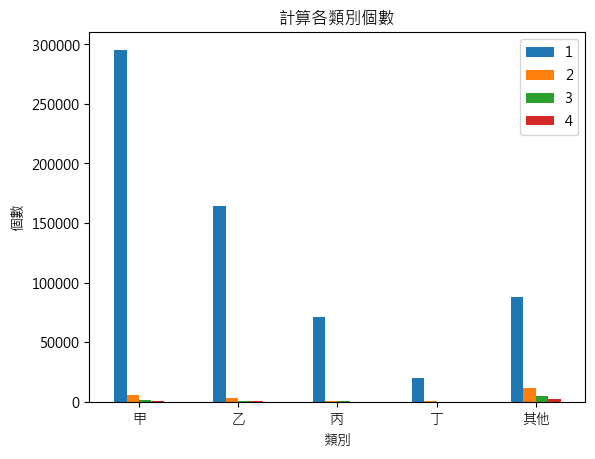

In [10]:
import numpy as np
counts = df.count()

names = ["甲", "乙", "丙", "丁", "其他"]
data = np.array(counts[1:21]).reshape(-1, 4)

pd.DataFrame(data, index=names, columns=range(1,5)).plot(kind="bar", title="計算各類別個數", xlabel="類別", ylabel="個數", rot=0)

In [11]:
target_icds = pd.unique(df.iloc[:,23:43].values.ravel('K'))
print("資料集出現的 ICD 總數: ", len(target_icds))
print(target_icds)

資料集出現的 ICD 總數:  14968
['急性腎衰竭' '心室顫動' '腎衰竭' ... '腸潰瘍' '胃功能障礙' '尿酸性腎病變']


In [12]:
icd_set = set(icd["中文診斷"].values)
intersection = icd_set.intersection(target_icds)
difference = set(target_icds).difference(icd_set)
difference.remove(np.nan)
print("ICD 數量: ", len(intersection))
print("非 ICD 數量: ", len(difference))

ICD 數量:  14379
非 ICD 數量:  588


In [13]:
icd_dict = dict(zip(icd["中文診斷"], icd["ICD1_Iris"]))
intersection_icd = [icd_dict[i] for i in intersection]
print("ICD1_Iris 數量: ", len(set(intersection_icd)))

ICD1_Iris 數量:  2183
